# Task-3 : Exploratory Data Analysis - Retail

# The Sparks Foundation - GRIP JAN21

# RITIK BHARDWAJ

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
print(df.shape)
df.info()

(9994, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###### There are no null values in data



##### Correlation between numerical data

<AxesSubplot:>

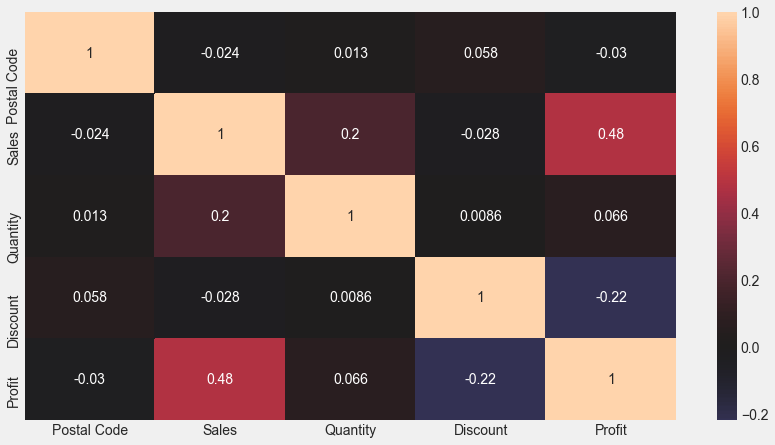

In [8]:
plt.figure(figsize = (13,7))
sns.heatmap(df.corr(), annot = True, center =0 )


##### There is positive correlation between Sales and Profit but there is negative correlation between Sales and Discount. This means offering discount is causing dip in Profit . Let's Dive Further

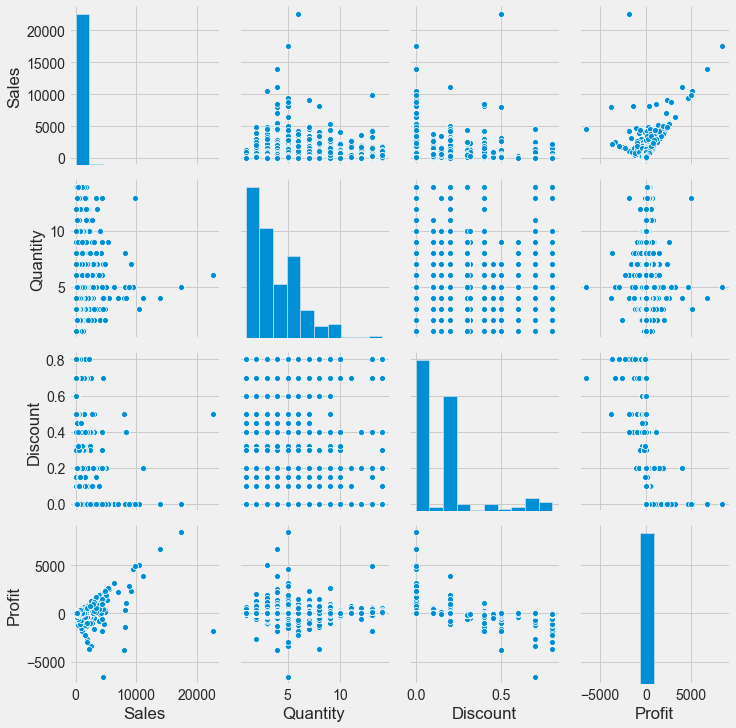

In [9]:
df =df.drop("Postal Code", axis =1)
sns.pairplot(df)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

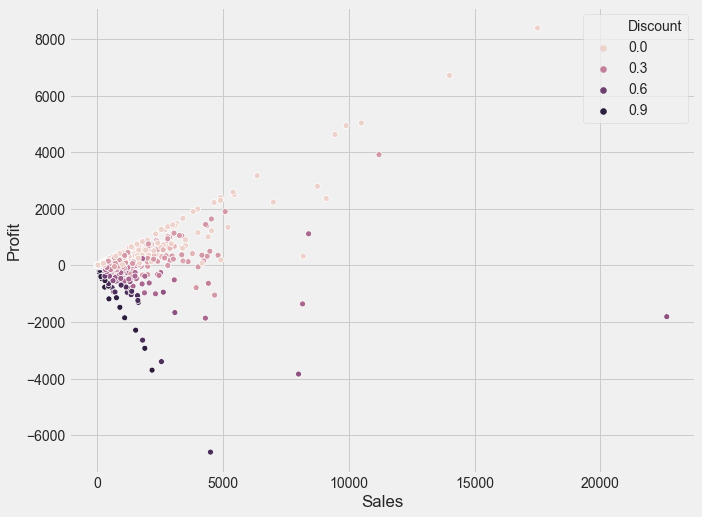

In [10]:
plt.figure(figsize = (10,8))
sns.scatterplot("Sales","Profit","Discount", data = df)

## The heigher the discount the more is loss

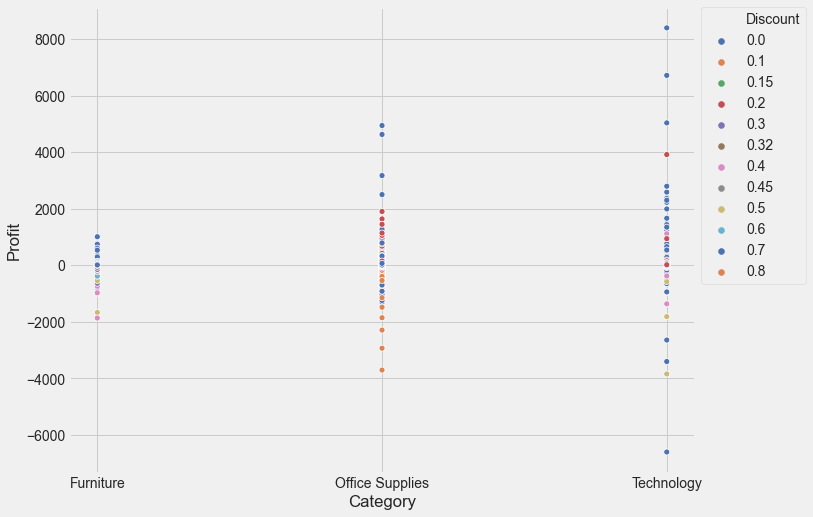

In [11]:
plt.figure(figsize = (10,8))
sns.scatterplot("Category","Profit","Discount", data = df, palette = "deep")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

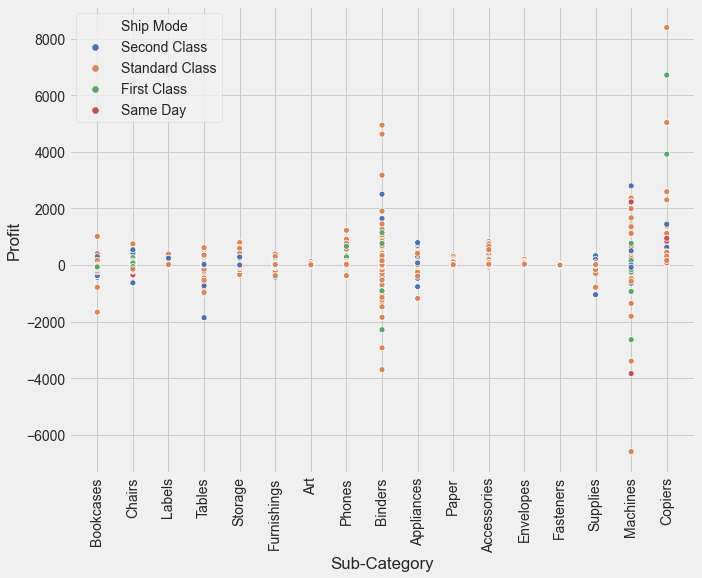

In [12]:

plt.figure(figsize = (10,8))
sns.scatterplot("Sub-Category","Profit","Ship Mode", data = df, palette = "deep")
plt.xticks(rotation = 90)
plt.show()

In [13]:
print("There are ",df.State.nunique(), " different sates")

There are  49  different sates


## Profit Per states

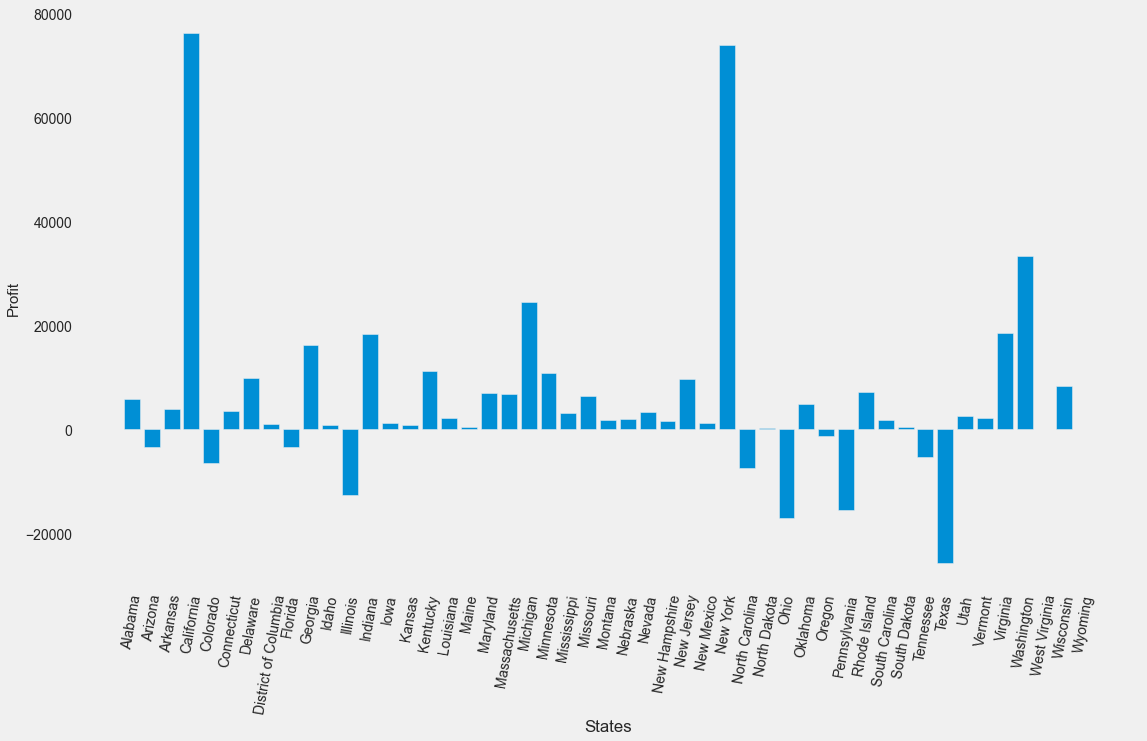

In [14]:
keys = [state for state, data in df.groupby(["State"])]
plt.figure(figsize= (17,10))
plt.bar(keys, df.groupby(["State"]).sum()["Profit"])
plt.xticks(keys,rotation = 80)
plt.ylabel("Profit", size = 15)
plt.xlabel("States")
plt.grid()

In [15]:
Account_per_state = df.groupby("State").sum()
#Account_per_state

# State getting good profit

In [16]:
Account_per_state.nlargest(10, ["Profit"])

,Sales,Quantity,Discount,Profit
State,,,,
California,457687.6315,7667,145.6,76381.3871
New York,310876.2710,4224,62.4,74038.5486
Washington,138641.2700,1883,32.4,33402.6517
Michigan,76269.6140,946,1.8,24463.1876
Virginia,70636.7200,893,0.0,18597.9504
Indiana,53555.3600,578,0.0,18382.9363
Georgia,49095.8400,705,0.0,16250.0433
Kentucky,36591.7500,523,0.0,11199.6966
Minnesota,29863.1500,331,0.0,10823.1874


### California is the state with heighest Sale and Profit

<AxesSubplot:xlabel='State'>

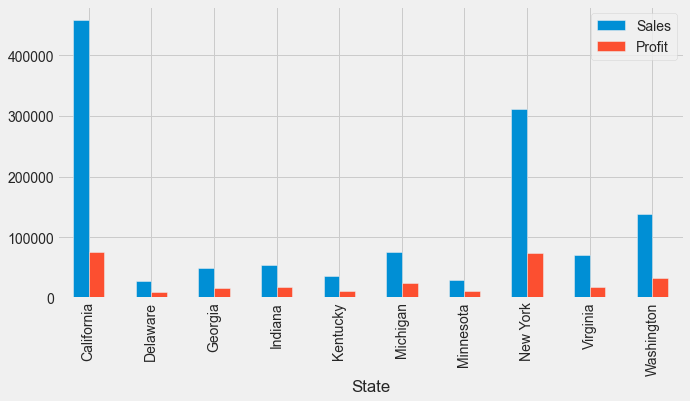

In [30]:
df1 = df[df["State"].isin(["California", "New York", "Washington", "Michigan","Virginia","Indiana","Georgia",\
                           "Kentucky","Minnesota","Delaware"])]
dt1_states = df1.groupby(["State"]).sum()
dt1_states.drop(["Discount","Quantity"], axis = 1, inplace = True)
dt1_states.plot.bar(figsize = (10,5))

### Here Profit increases with Sales. California, New York having heighest Sales have heighest Profit

<AxesSubplot:xlabel='Ship Mode'>

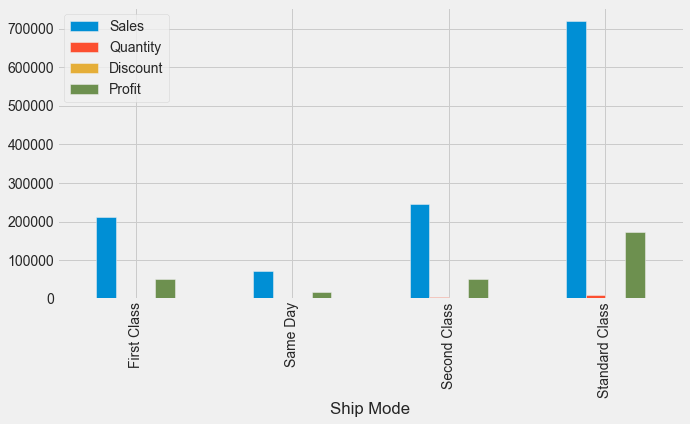

In [29]:
## Ship Mode for State having good Profit
df1.groupby(["Ship Mode"]).sum().plot.bar(figsize = (10,5))

###### We found that Standard class Ship Mode for States having good profit is best as it have largest sale and largest profit

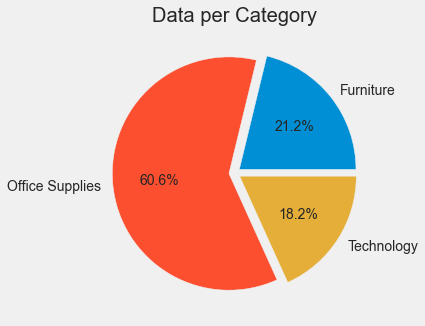

In [18]:
data_1 = df1.groupby("Category")['Category'].count()
label_1 = data_1.keys()
plt.figure(figsize = (5,5))
plt.pie(x = data_1, autopct="%.1f%%", labels = label_1,explode=[0.05]*3)
plt.title("Data per Category")
plt.show()

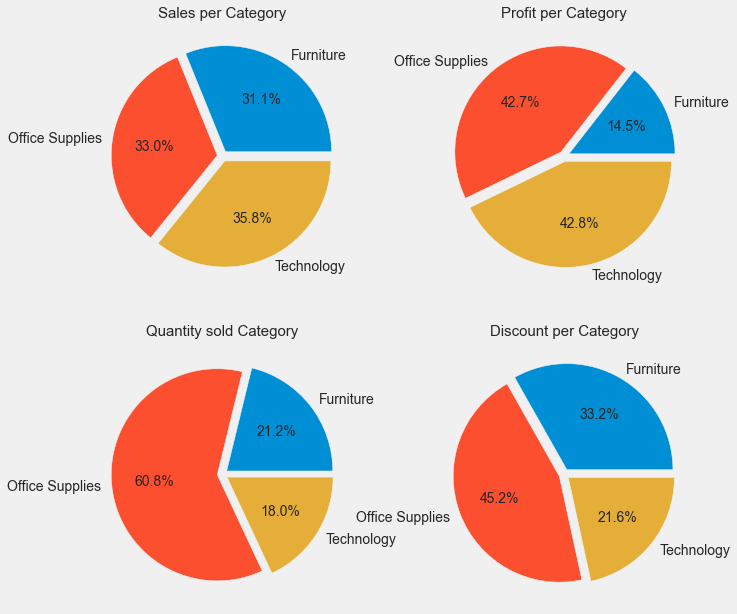

In [19]:
data_1_sales = df1.groupby("Category").Sales.sum()
label_1_sales = data_1_sales.keys()

data_1_profit = df1.groupby("Category").Profit.sum()
label_1_profit = data_1_profit.keys()

data_1_quantity = df1.groupby("Category").Quantity.sum()
label_1_quantity = data_1_quantity.keys()

data_1_discount = df1.groupby("Category").Discount.sum()
label_1_discount = data_1_discount.keys()


fig, (axes1, axes2) = plt.subplots(2,2, figsize = (10,10))
axes1[0].pie(x = data_1_sales, autopct="%.1f%%", labels = label_1_sales,explode=[0.05]*3)
axes1[0].set_title("Sales per Category", fontsize = 15)
axes1[1].pie(x = data_1_profit, autopct="%.1f%%", labels = label_1_profit,explode=[0.05]*3)
axes1[1].set_title("Profit per Category", fontsize = 15)
axes2[0].pie(x = data_1_quantity, autopct="%.1f%%", labels = label_1_quantity,explode=[0.05]*3)
axes2[0].set_title("Quantity sold Category", fontsize = 15)
axes2[1].pie(x = data_1_discount, autopct="%.1f%%", labels = label_1_discount,explode=[0.05]*3)
axes2[1].set_title("Discount per Category", fontsize = 15)
plt.show()

### Technology Tools fetch heighest Profit despite low Discount and Quantity Sold. It is due to high price per piece.

<AxesSubplot:xlabel='Sub-Category'>

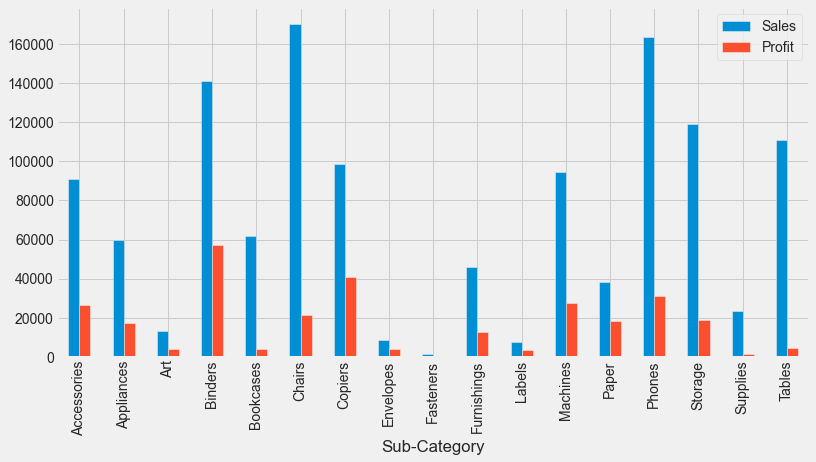

In [20]:
per_category = df1.groupby(["Sub-Category"]).sum()
per_category.drop(["Discount","Quantity"],axis = 1, inplace = True)
per_category.plot.bar(figsize = (12,6))

### Generally the more the sale the more profit is but Sub-Categories like Chairs, Tables and Suppliers could not fetch much profit in comprasion of their sales

<AxesSubplot:xlabel='Sub-Category'>

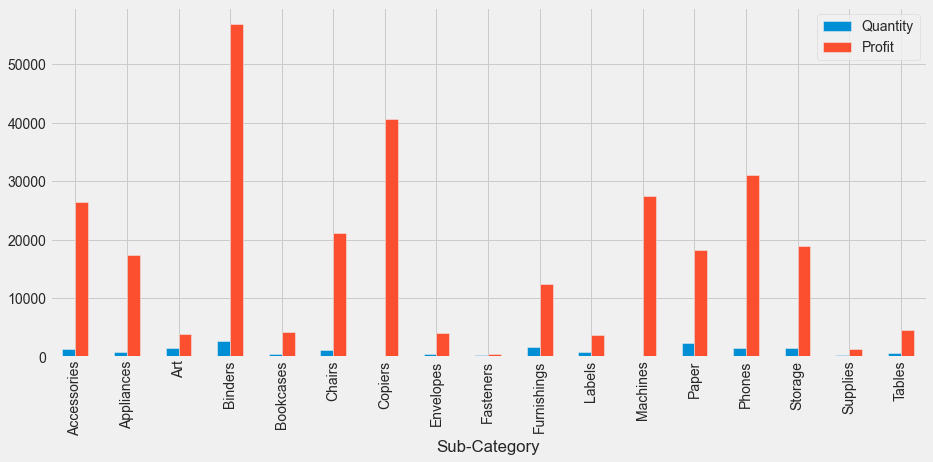

In [21]:
per_categorya = df1.groupby(["Sub-Category"]).sum()
per_categorya.drop(["Sales","Discount"], axis =1, inplace = True)
per_categorya.plot.bar(figsize = (14,6))

<AxesSubplot:xlabel='Sub-Category'>

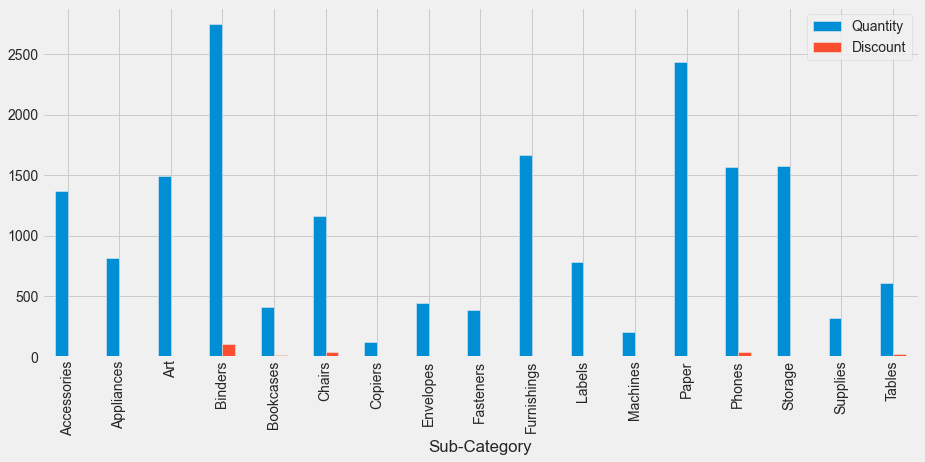

In [22]:
per_categoryb = df1.groupby(["Sub-Category"]).sum()
per_categoryb.drop(["Sales","Profit"], axis =1, inplace = True)
per_categoryb.plot.bar(figsize = (14,6))

##### Binders have highest Profit , highest quantity sold and highest Discount . So giving Discount on Binders Sales was Positive, while it was not good for Tables and Chairs

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

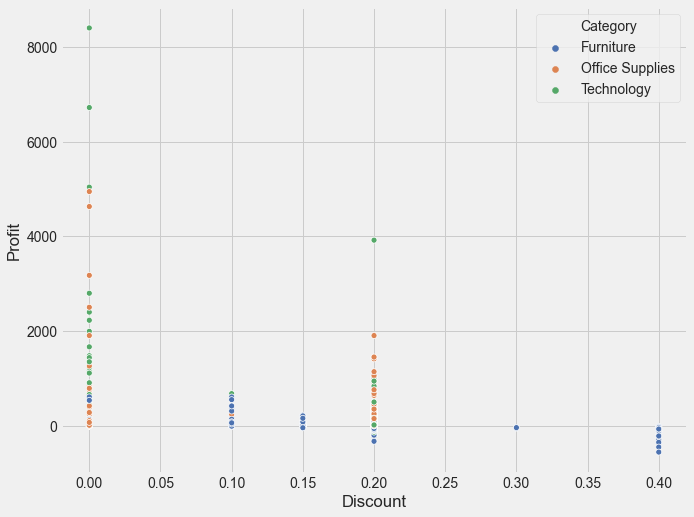

In [23]:
plt.figure(figsize = (10,8))
sns.scatterplot(df1["Discount"], df1["Profit"], hue =df1["Category"],palette = "deep")

### We noticed that discount more than 0.20 makes less Profit

# 2. States Suffering loss

In [24]:
Account_per_state[Account_per_state.Profit < 0].sort_values("Profit", ascending = True)

,Sales,Quantity,Discount,Profit
State,,,,
Texas,170188.0458,3724,364.64,-25729.3563
Ohio,78258.1360,1759,152.40,-16971.3766
Pennsylvania,116511.9140,2153,192.90,-15559.9603
Illinois,80166.1010,1845,191.90,-12607.8870
North Carolina,55603.1640,983,70.60,-7490.9122
Colorado,32108.1180,693,57.60,-6527.8579
Tennessee,30661.8730,681,53.30,-5341.6936
Arizona,35282.0010,862,68.00,-3427.9246
Florida,89473.7080,1379,114.65,-3399.3017


<AxesSubplot:xlabel='State'>

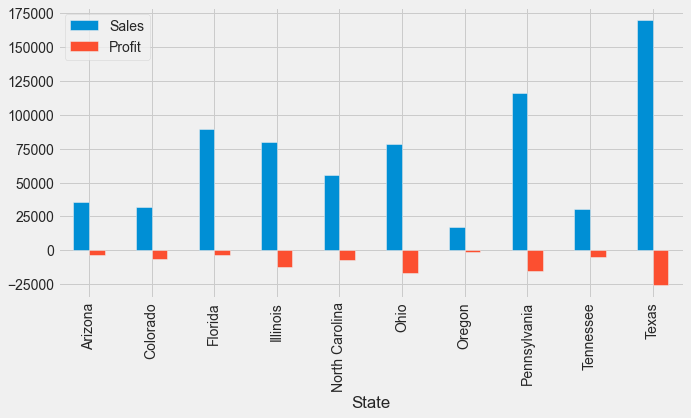

In [28]:
df2 = df[df["State"].isin(["Texas", "Ohio", "Pennsylvania", "Illinois","North Carolina","Colorado","Tennessee",\
                           "Arizona","Florida","Oregon"])]
dt2_states = df2.groupby(["State"]).sum()
dt2_states.drop(["Discount","Quantity"], axis = 1, inplace = True)
dt2_states.plot.bar(figsize = (10,5))

### For These Sates suffering loss the more the sale is the more is loss. Texas having  heighest sales have heighest Loss

<AxesSubplot:xlabel='Ship Mode'>

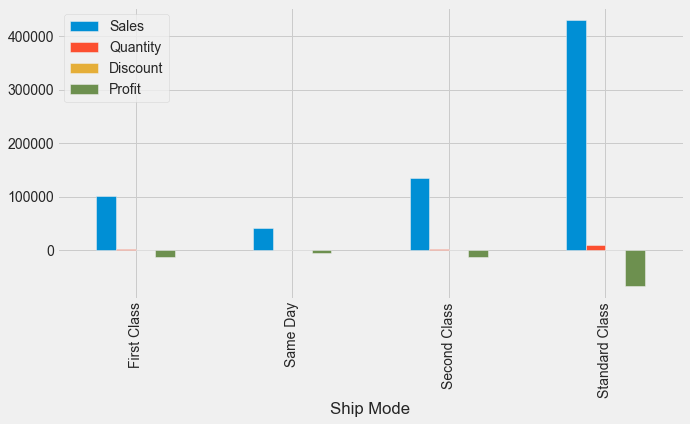

In [26]:
df2.groupby(["Ship Mode"]).sum().plot.bar(figsize = (10,5))

### We found that every Ship Mode is facing loss the more the sales is the more  is the loss

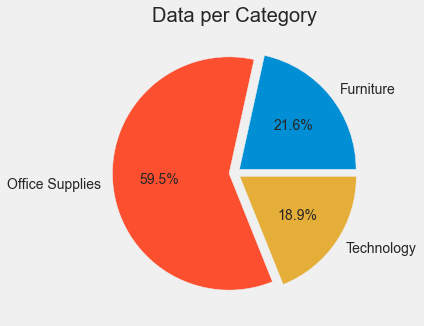

In [222]:
data_2 = df2.groupby("Category")['Category'].count()
label_2 = data_2.keys()
plt.figure(figsize = (5,5))
plt.pie(x = data_2, autopct="%.1f%%", explode=[0.05]*3, labels = label_2)
plt.title("Data per Category")
plt.show()

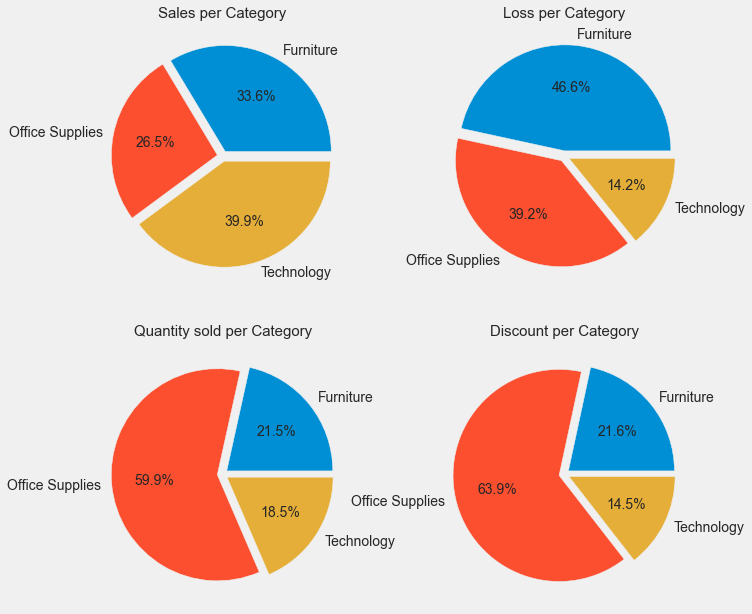

In [223]:
data_2_sales = df2.groupby("Category").Sales.sum()
label_2_sales = data_2_sales.keys()

data_2_profit = df2.groupby("Category").Profit.sum()
label_2_profit = data_2_profit.keys()

data_2_quantity = df2.groupby("Category").Quantity.sum()
label_2_quantity = data_2_quantity.keys()

data_2_discount = df2.groupby("Category").Discount.sum()
label_2_discount = data_2_discount.keys()


fig, (axes1, axes2) = plt.subplots(2,2, figsize = (10,10))
axes1[0].pie(x = data_2_sales, autopct="%.1f%%", labels = label_2_sales,explode=[0.05]*3)
axes1[0].set_title("Sales per Category", fontsize = 15)
axes1[1].pie(x = -data_2_profit, autopct="%.1f%%", labels = label_2_profit,explode=[0.05]*3)
axes1[1].set_title("Loss per Category", fontsize = 15)
axes2[0].pie(x = data_2_quantity, autopct="%.1f%%", labels = label_2_quantity,explode=[0.05]*3)
axes2[0].set_title("Quantity sold per Category", fontsize = 15)
axes2[1].pie(x = data_2_discount, autopct="%.1f%%", labels = label_2_discount,explode=[0.05]*3)
axes2[1].set_title("Discount per Category", fontsize = 15)
plt.show()

## we noticed that Furniture fetch Maximum loss while loss for technology was lower in comprasion of sales. Despite having high Discount for Office Supplies the loss was low in comprasion of Furniture. So offering Discount for Office Suplies was good to sold more categories.

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

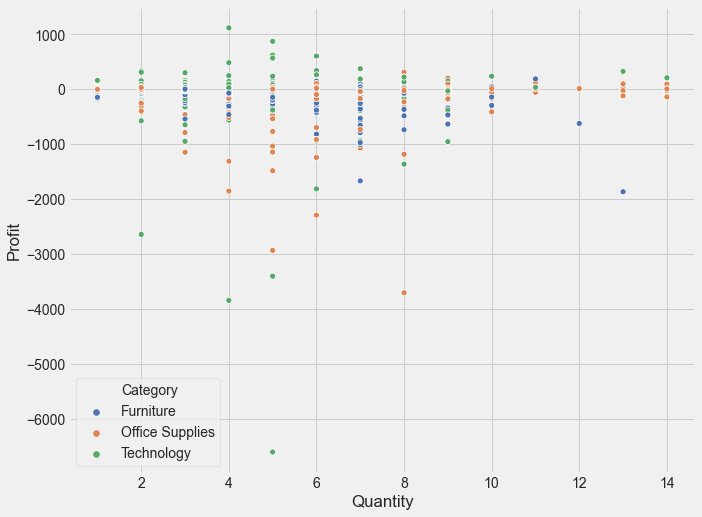

In [225]:
plt.figure(figsize = (10,8))
sns.scatterplot(df2["Quantity"], df2["Profit"], hue =df2["Category"],palette = "deep")

### We noticed that the more quantites sold of Office Supplies and technology loss is no more. we can make  discounts to sold more Quantities and get Profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

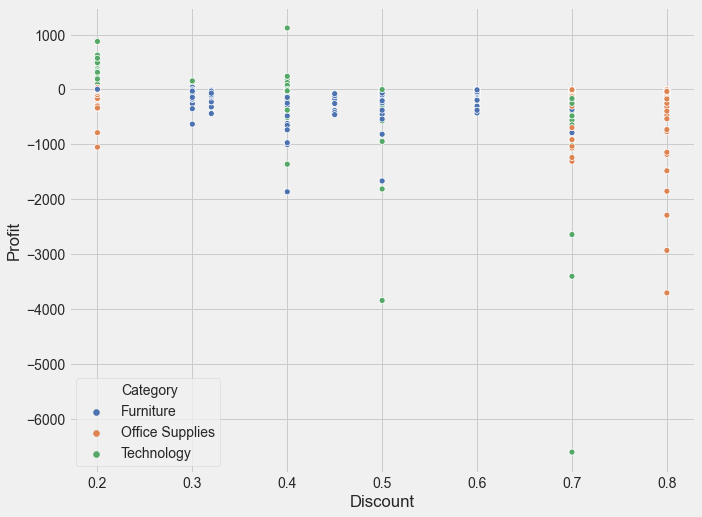

In [226]:
plt.figure(figsize = (10,8))
sns.scatterplot(df2["Discount"], df2["Profit"], hue =df2["Category"],palette = "deep")

## The larger the discount  for office supplies the lower  is the profit . We should reduce the discount for office supplies to level the Profit

<AxesSubplot:xlabel='Sub-Category'>

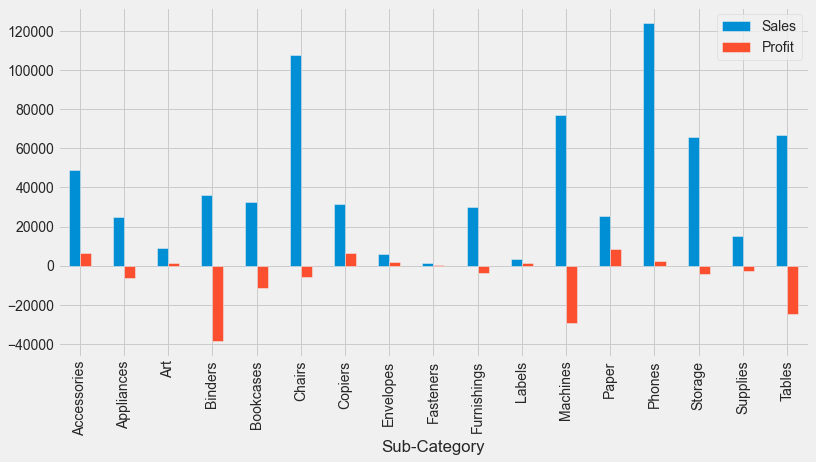

In [227]:
per_category2 = df2.groupby(["Sub-Category"]).sum()
per_category2.drop(["Discount","Quantity"],axis = 1, inplace = True)
per_category2.plot.bar(figsize = (12,6))

<AxesSubplot:xlabel='Sub-Category'>

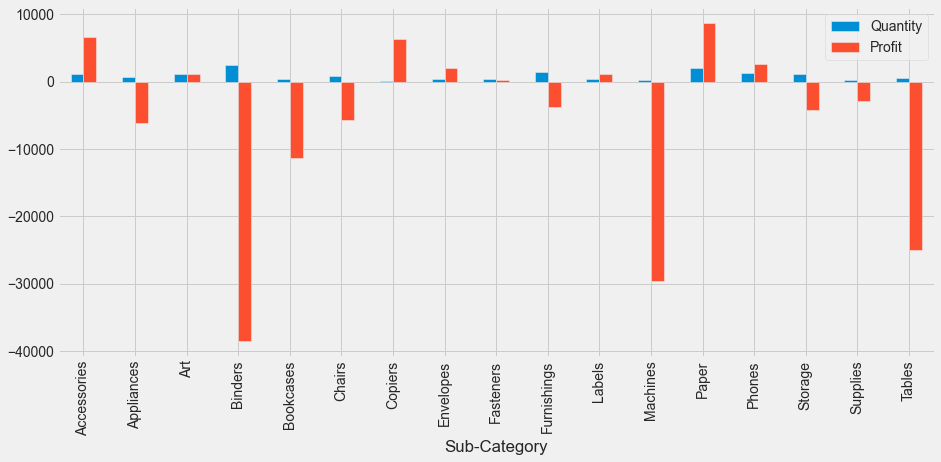

In [228]:
per_category2a = df2.groupby(["Sub-Category"]).sum()
per_category2a.drop(["Sales","Discount"], axis =1, inplace = True)
per_category2a.plot.bar(figsize = (14,6))

<AxesSubplot:xlabel='Sub-Category'>

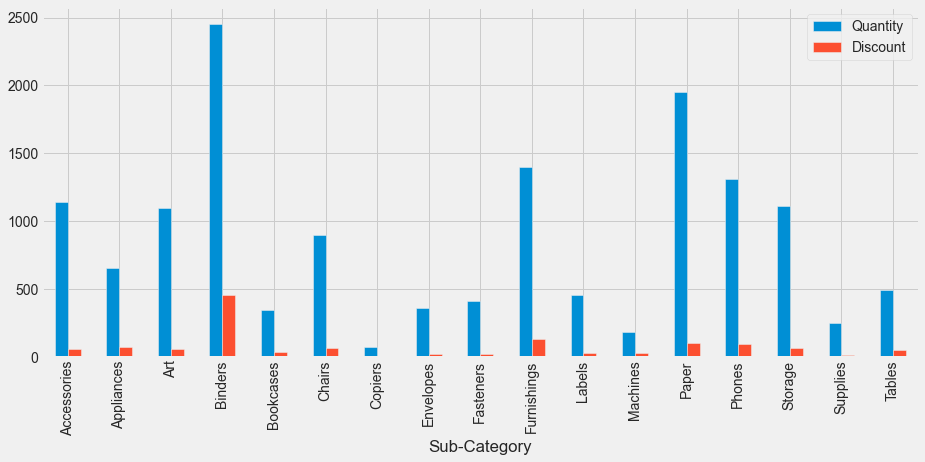

In [229]:
per_category2b = df2.groupby(["Sub-Category"]).sum()
per_category2b.drop(["Sales","Profit"], axis =1, inplace = True)
per_category2b.plot.bar(figsize = (14,6))

### Binders and Machines have maximum loss. Binders have Maximum Quantity sold but due to its high discount the loss is maximum. The discount for Tables, Binders should be reduced. While Sub-Categories like Paper Accessories are getting good profit so their sales can be increased by increasing discount on them

# Takeaways:
# 1. Technology Category have largest Share in Profit so Sales of them should be increased to increase Profit.
# 2. Furniture Category make big loss in States suffering loss, Discount on some Sub- Categories like Binders, Chairs are one of reason for loss. So discount should be reduced
# 3. States Suffers loss not due to less sale but due to Discount.

# Thanks